<a href="https://colab.research.google.com/github/thefloat/tutorials/blob/master/decision_boundry_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary of a binary classification model.

    Parameters:
    - model: A trained classification model with a `predict` method.
    - X: Feature matrix (2D NumPy array or Pandas DataFrame with two features).
    - y: Target labels (1D NumPy array or Pandas Series).
    """
    # Define the grid range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Make predictions on the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Set figure size
    plt.figure(figsize=(18, 12))  # Custom figure size

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.5)
    # plt.contour(xx, yy, Z, levels=[0.5])


    # Plot grid lines (vertical and horizontal)
    for i in range(xx.shape[1]):  # Loop through columns
        plt.plot(xx[:, i], yy[:, i], 'k-', lw=0.5)  # Vertical lines

    for i in range(xx.shape[0]):  # Loop through rows
        plt.plot(xx[i, :], yy[i, :], 'k-', lw=0.5)  # Horizontal lines

    # Plot the grid points
    # plt.scatter(xx, yy, color="gray", marker=".", alpha=0.5, label="Mesh Grid Points")

    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr, label="Data Points")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()


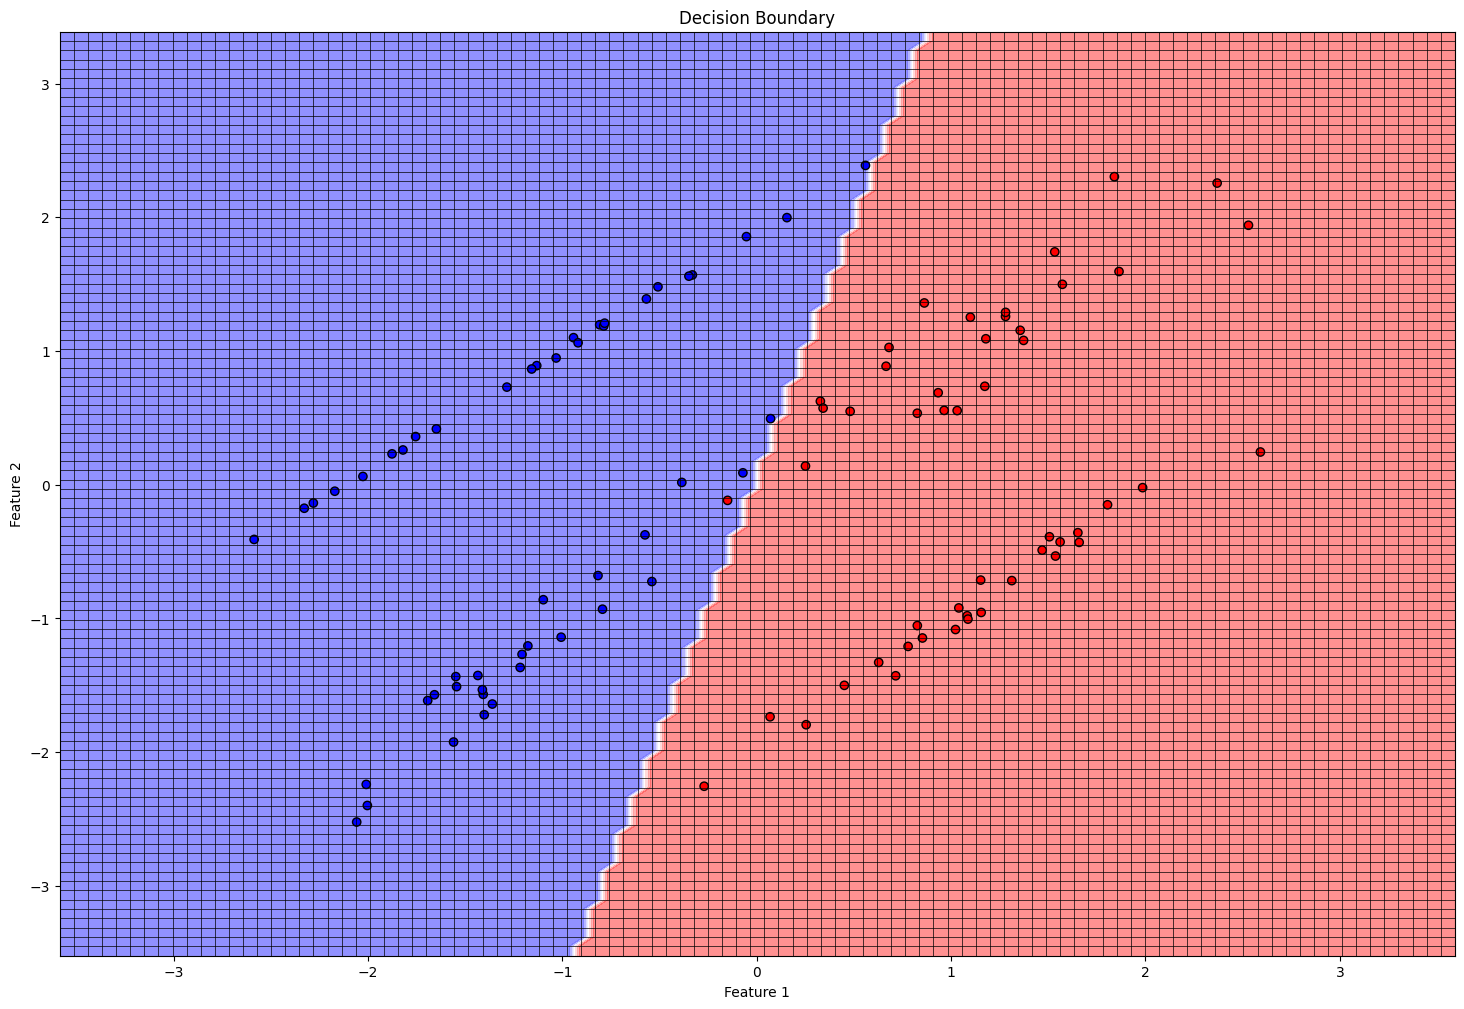

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate example data
X, y = make_classification(n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Train a model
model = LogisticRegression()
model.fit(X, y)

# Plot the decision boundary
plot_decision_boundary(model, X, y)
